In [175]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
dir_gams = "~/codes/CIAM-Work/gams-outputs/gams-results"

## RCP8.5 baseline results from Diaz 2016

file names

In [154]:
files_rcp85 = ["rcp85p50ref"+str(k)+".csv" for k in range(1,11)]

read the files, place in a list of Pandas DataFrames

In [155]:
dfG_all = []
for file in files_rcp85:
    dfG_all.append(pd.read_csv(dir_gams+"/rcp85/"+file))

In [156]:
dfG1 = dfG_all[0]

concatenate all into a master file. don't worry about the times being out of order; the calculations will specify the year and type of damages to be summed up later

In [157]:
dfG = pd.concat(dfG_all)

remove the list of DataFrames to save on some memory

In [158]:
del dfG_all

### fix the segment names with apostrophes in them

In [159]:
for seg in dfG.segments.unique():
    if '\'' in seg:
        new_name = seg.replace('\'', '') 
        dfG.loc[(dfG.segments==seg), "segments"] = new_name

Gather up Diaz 2016 results into a DataFrame

In [129]:
NoAdaptCost, OptimalCost, FloodNoAdapt, WetlandNoAdapt, RelocateNoAdapt, StormCapitalNoAdapt, StormPopNoAdapt, WetlandRetreat, WetlandProtect = [], [], [], [], [], [], [], [], []
Construct10, ProtectCost10, StormPopProtect10, StormCapitalProtect10 = [], [], [], []
Construct10000, ProtectCost10000, StormPopProtect10000, StormCapitalProtect10000 = [], [], [], []
RetreatCost10, StormPopRetreat10, StormCapitalRetreat10, RelocateRetreat10 = [], [], [], []
RetreatCost10000, StormPopRetreat10000, StormCapitalRetreat10000, RelocateRetreat10000 = [], [], [], []
for t in range(1,11):
    NoAdaptCost.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="NoAdaptCost"), "value"].sum())
    OptimalCost.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="OptimalFixedCost"), "value"].sum())
    FloodNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="FloodNoAdapt"), "value"].sum())
    WetlandNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="WetlandNoAdapt"), "value"].sum())
    RelocateNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="RelocateNoAdapt"), "value"].sum())
    StormCapitalNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="StormCapitalNoAdapt"), "value"].sum())
    StormPopNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="StormPopNoAdapt"), "value"].sum())
    WetlandRetreat.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="WetlandRetreat"), "value"].sum())
    WetlandProtect.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="WetlandProtect"), "value"].sum())
    Construct10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="ConstructOptimalFixed"), "value"].sum())
    ProtectCost10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="ProtectCost"), "value"].sum())
    StormPopProtect10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="StormPopProtect"), "value"].sum())
    StormCapitalProtect10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="StormCapitalProtect"), "value"].sum())
    RetreatCost10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="RetreatCost"), "value"].sum())
    StormPopRetreat10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="StormPopRetreat"), "value"].sum())
    StormCapitalRetreat10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="StormCapitalRetreat"), "value"].sum())
    RelocateRetreat10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="RelocateRetreat"), "value"].sum())
    Construct10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="ConstructOptimalFixed"), "value"].sum())
    ProtectCost10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="ProtectCost"), "value"].sum())
    StormPopProtect10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="StormPopProtect"), "value"].sum())
    StormCapitalProtect10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["level"]==10000) & (dfG["variable"]=="StormCapitalProtect"), "value"].sum())
    RetreatCost10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="RetreatCost"), "value"].sum())
    StormPopRetreat10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="StormPopRetreat"), "value"].sum())
    StormCapitalRetreat10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="StormCapitalRetreat"), "value"].sum())
    RelocateRetreat10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="RelocateRetreat"), "value"].sum())

dfDiaz = pd.DataFrame()
dfDiaz["time"] = list(range(2010,2110,10))
dfDiaz["NoAdapt"] = NoAdaptCost
dfDiaz["Optimal"] = OptimalCost
dfDiaz["FloodNoAdapt"] = FloodNoAdapt
dfDiaz["WetlandNoAdapt"] = WetlandNoAdapt
dfDiaz["RelocateNoAdapt"] = RelocateNoAdapt
dfDiaz["StormCapitalNoAdapt"] = StormCapitalNoAdapt
dfDiaz["StormPopNoAdapt"] = StormPopNoAdapt
dfDiaz["WetlandProtect"] = WetlandProtect
dfDiaz["Construct"] = Construct
dfDiaz["WetlandRetreat"] = WetlandRetreat
dfDiaz["ProtectCost10"] = ProtectCost10
dfDiaz["StormPopProtect10"] = StormPopProtect10
dfDiaz["StormCapitalProtect10"] = StormCapitalProtect10
dfDiaz["RetreatCost10"] = RetreatCost10
dfDiaz["StormPopRetreat10"] = StormPopRetreat10
dfDiaz["StormCapitalRetreat10"] = StormCapitalRetreat10
dfDiaz["RelocateRetreat10"] = RelocateRetreat10
dfDiaz["ProtectCost10000"] = ProtectCost10000
dfDiaz["StormPopProtect10000"] = StormPopProtect10000
dfDiaz["StormCapitalProtect10000"] = StormCapitalProtect10000
dfDiaz["RetreatCost10000"] = RetreatCost10000
dfDiaz["StormPopRetreat10000"] = StormPopRetreat10000
dfDiaz["StormCapitalRetreat10000"] = StormCapitalRetreat10000
dfDiaz["RelocateRetreat10000"] = RelocateRetreat10000

Matches the paper well (Fig 2, right column), except in the last year when things jump up just a bit too much. Paper reports \\$2.2T in the NoAdapt case and \\$270B in the Optimal adaptation case.

In [114]:
print(np.round(dfDiaz[["time","NoAdapt","Optimal"]],2))

   time  NoAdapt  Optimal
0  2010   119.17    29.27
1  2020   189.34    33.03
2  2030   304.23    39.72
3  2040   484.77    52.75
4  2050   787.10   115.54
5  2060  1217.03   132.09
6  2070  1566.37   148.21
7  2080  1878.13   163.73
8  2090  2043.67   178.02
9  2100  2251.46   282.07


## New results

In [747]:
dfC = pd.read_csv("./output/ctrl+noConstrFix_global_85p50ssp0fixed.csv")
dfN = pd.read_csv("./output/ctrl+noConstrFix_seg_85p50ssp0fixed.csv")
dfO = pd.read_csv("./output/ctrl+noConstrFix_seg_85p50ssp0fixed_optimal.csv") # optimal actions for each segment

or grab results

In [ ]:
dfC = pd.read_csv("dfC.csv")
dfN = pd.read_csv("dfN.csv")
dfO = pd.read_csv("dfO.csv")

In [748]:
dfC1 = dfC.copy() # copies so that the new, shorter-foresight model version can be compared to old perfect foresight version
dfN1 = dfN.copy()
dfO1 = dfO.copy()

## NPV foresight correction

This correction accounts for the fact that the new version of CIAM considers NPV over the current adaptation period (40-50 years generally), whereas the previous GAMS version assumes NPV is known across the entire model time horizon (2000-2100, for example).

#### discount factor 

Matches output from a run model in Julia `m[:slrcost, :discountfactor]`

`v.discountfactor[TimestepIndex(i)] = 1/(1 + p.discountrate)^(p.tstep * (i-1))`

In [617]:
drate = 0.04
tstep = 10
discountfactor = 1/(1+drate)**(tstep*np.arange(0,20,1))
print(discountfactor)

[1.00000000e+00 6.75564169e-01 4.56386946e-01 3.08318668e-01
 2.08289045e-01 1.40712615e-01 9.50604010e-02 6.42194008e-02
 4.33843261e-02 2.93088962e-02 1.98000401e-02 1.33761976e-02
 9.03647984e-03 6.10472199e-03 4.12413144e-03 2.78611543e-03
 1.88219975e-03 1.27154671e-03 8.59011398e-04 5.80317321e-04]


#### segments

In [618]:
segments_G, segments_N = {}, {}
for t in range(1,21):
    segments_G[t] = list(dfG.loc[(dfG.time==t), "segments"].unique())
    segments_N[t] = list(dfN.loc[(dfN.time==t), "segments"].unique())
segments_G["all"] = list(dfG.segments.unique())
segments_N["all"] = list(dfN.segments.unique())

Need to do the first time step separately. it is special because in the "fixed" mode a la original (GAMS) CIAM, this is where the adaptation strategy is determined. This strategy (including level) will be followed throughout the time horizon.

In [658]:
tol= 0.0001
levs = {"RetreatCost" : [1,10,100,1000,10000], "ProtectCost" : [10,100,1000,10000], "NoAdaptCost" : [0]}
options = []
for var in ["RetreatCost","ProtectCost"]:
    for lev in levs[var]:
            options.append(var+str(lev))
options.append("NoAdaptCost0")

### find which segments have a mismatch; otherwise, this fix won't do anything since there's no change to the segment

In [ ]:
actions_G = {}
dfGsub = dfG.loc[(dfG.time==1) & (dfG.variable.isin(["OptimalFixedCost","NoAdaptCost","ProtectCost","RetreatCost"]))]
for seg in dfGsub.loc[(dfGsub.time==1)&(dfGsub.variable=="OptimalFixedCost"), "segments"].unique():
    cost = float(dfGsub.loc[(dfGsub.time==1) & (dfGsub.segments==seg) & (dfGsub.variable=="OptimalFixedCost"), "value"])
    level_action = dfGsub.loc[(dfGsub.time==1) & (dfGsub.segments==seg) & 
                              (dfGsub.value==cost) & (dfGsub.variable!="OptimalFixedCost"),["level","variable"]]
    if level_action["variable"].iloc[0]=="NoAdaptCost":
        actions_G[seg] = level_action["variable"].iloc[0]+"0"
    else:
        actions_G[seg] = level_action["variable"].iloc[0]+str(int(level_action["level"].iloc[0]))
        
actions_N = {}
dfNsub = dfN.loc[(dfN.time==1) & (dfN.variable.isin(["OptimalCost","NoAdaptCost","ProtectCost","RetreatCost"]))]
for seg in dfNsub.loc[(dfNsub.time==1)&(dfNsub.variable=="OptimalCost"), "segments"].unique():
    cost = float(dfNsub.loc[(dfNsub.time==1) & (dfNsub.segments==seg) & (dfNsub.variable=="OptimalCost"), "value"])
    level_action = dfNsub.loc[(dfNsub.time==1) & (dfNsub.segments==seg) & 
                              (dfNsub.value==cost) & (dfNsub.variable!="OptimalCost"),["level","variable"]]
    if level_action["variable"].iloc[0]=="NoAdaptCost":
        actions_N[seg] = level_action["variable"].iloc[0]+"0"
    else:
        actions_N[seg] = level_action["variable"].iloc[0]+str(int(level_action["level"].iloc[0]))
        
mismatches = {}
for seg in actions_G.keys():
    if actions_G[seg]!=actions_N[seg]:
        mismatches[seg] = (actions_G[seg],actions_N[seg])

Compute the NPV using the full time horizon for decision-making (entire simulation period), instead of the new version's shorter time horizon (40-50 years).

In [299]:
import time

In [756]:
tbeg = time.time()

new_costs, new_NPV = [0]*len(mismatches), [0]*len(mismatches)
new_choices = [0]*len(mismatches)
old_costs = [0]*len(mismatches)

# dict keys don't have fixed order, so save as a list
mismatch_segments = list(mismatches.keys())

# subset to only segments we need
dfNsub = dfN.loc[(dfN.segments.isin(mismatch_segments))]
dfOsub = dfO.loc[(dfO.segments.isin(mismatch_segments))]
dfGsub = dfG.loc[(dfG.segments.isin(mismatch_segments))]

for seg in mismatch_segments:
    s = mismatch_segments.index(seg)

    t=1 # needs to be reset each segment
    option_costs = []
    for var in ["RetreatCost","ProtectCost","NoAdaptCost"]:
        for lev in levs[var]:
            if var != "NoAdaptCost":
                NPV = dfNsub.loc[(dfNsub.variable==var) & (dfNsub.segments==seg) & 
                                 (dfNsub.level==lev), "value"]*discountfactor
            else:
                NPV = dfNsub.loc[(dfNsub.variable==var) & (dfNsub.segments==seg),"value"]*discountfactor
            option_costs.append(np.sum(NPV))
    new_NPV[s] = min(option_costs)
    new_choices[s] = options[option_costs.index(new_NPV[s])]
    # get the new optimal costs in this time step
    var = new_choices[s][:7]+"Cost"  # RetreatCost, ProtectCost, NoAdaptCost
    lev = int(re.findall(r'\d+', new_choices[s])[0])
    if var != "NoAdaptCost":
        new_costs[s] = float(dfNsub.loc[(dfNsub.segments==seg) & (dfNsub.time==t) & 
                                        (dfNsub.variable==var) & (dfNsub.level==lev), "value"])
    else:
        new_costs[s] = float(dfNsub.loc[(dfNsub.segments==seg) & (dfNsub.time==t) & 
                                        (dfNsub.variable==var), "value"])
    old_costs[s] = float(dfOsub.loc[(dfOsub.segments==seg) & (dfOsub.time==t), "OptimalCost"])

    # correct the results dataframes to match the GAMS version's perfect foresight
    dfO.loc[(dfO.segments==seg),"variable"] = var  # these are assuming fixed mode
    dfO.loc[(dfO.segments==seg),"level"] = lev
    dfO.loc[(dfO.segments==seg) & (dfO.time==t),"OptimalCost"] = new_costs[s]
    dfN.loc[(dfN.segments==seg) & (dfN.time==t) & (dfN.variable=="OptimalCost"), "value"] = new_costs[s]
    dfC.loc[(dfC.time==t) & (dfC.variable=="OptimalCost"), "value"] = dfC.loc[(dfC.time==t) & (dfC.variable=="OptimalCost"), "value"] - \
                                                                      old_costs[s] + new_costs[s]
    # In subsequent years, the choice and level stay the same. So, just need to correct things in dfO, dfN, and dfC. 
    # Retain the other versions of these dataframes from above to compare how the perfect foresight leads to an overestimation of costs.
    for t in dfC.time.unique()[1:]:
        if var!="NoAdaptCost":
            optcost = float(dfNsub.loc[(dfNsub.segments==seg) & (dfNsub.time==t) & 
                                       (dfNsub.variable==var) & (dfNsub.level==lev), "value"])
        else:
            optcost = float(dfNsub.loc[(dfNsub.segments==seg) & (dfNsub.time==t) & 
                                       (dfNsub.variable==var), "value"])
        old_optcost = float(dfNsub.loc[(dfNsub.segments==seg) & (dfNsub.time==t) & (dfNsub.variable=="OptimalCost"), "value"])
        dfN.loc[(dfN.segments==seg) & (dfN.time==t) & (dfN.variable=="OptimalCost"), "value"] = optcost
        dfO.loc[(dfO.segments==seg) & (dfO.time==t), "OptimalCost"] = optcost
        dfC.loc[(dfC.time==t) & (dfC.variable=="OptimalCost"), "value"] += optcost - old_optcost
        
tend = time.time()
print((tend-tbeg)/60)

1542.6444862524668


Save the cleaned DataFrames that reflect the perfect foresight.

In [758]:
dfC.to_csv("dfC.csv")
dfN.to_csv("dfN.csv")
dfO.to_csv("dfO.csv")

define a function to process a pair of results DataFrames (need optimal costs/actions one, the total costs one, and the subcosts one) into the form needed to make the bar chart decomposition of costs (below). Assumes `fixed=true`

In [1219]:
def process_costs_df(dfC, dfO, dfN, tmax=False):
    # set up
    ntime = len(dfO.time.unique())
    levs = {"RetreatCost" : [1,10,100,1000,10000], "ProtectCost" : [10,100,1000,10000], "NoAdaptCost" : [0]}
    
    # figure out which segments pursue which adaptation options, and at what levels of protection
    actions = {}
    for choice in levs.keys():
        for lev in levs[choice]:
            if lev > 0:
                actions[choice+str(lev)] = list(dfO.loc[(dfO.time==1)&(dfO.variable==choice)&(dfO.level==lev),"segments"])
            else:
                actions[choice+str(lev)] = list(dfO.loc[(dfO.time==1)&(dfO.variable==choice),"segments"])
    retreat_segs, protect_segs = [], []
    for lev in levs["RetreatCost"]:
        retreat_segs += actions["RetreatCost"+str(lev)]
    for lev in levs["ProtectCost"]:
        protect_segs += actions["ProtectCost"+str(lev)]
        
    # tally up costs associated with each action
    retreat_costs_N = [0]*ntime
    protect_costs_N = [0]*ntime
    inundation_costs_N = [0]*ntime
    wetland_costs_N = [0]*ntime
    flood_costs_N = [0]*ntime
    
    for t in range(1,ntime+1):
        dfNsub = dfN.loc[(dfN.time==t)] # subset to speed the loop up
        # retreat
        for lev in levs["RetreatCost"]:
            pname = "RetreatCost"+str(lev)
            retreat_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions[pname])) & (dfNsub.variable=="RelocateRetreat") & (dfNsub.level==lev), "value"].sum()
        retreat_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions["NoAdaptCost0"])) & (dfNsub.variable=="RelocateNoAdapt"), "value"].sum()
        # protect
        for lev in levs["ProtectCost"]:
            pname = "ProtectCost"+str(lev)
            protect_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions[pname])) & (dfNsub.variable=="Construct") & (dfNsub.level==lev), "value"].sum()
        # inundation (Flood)
        for lev in levs["RetreatCost"]:
            pname = "RetreatCost"+str(lev)
            inundation_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions[pname])) & (dfNsub.variable=="FloodRetreat") & (dfNsub.level==lev), "value"].sum()
        inundation_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions["NoAdaptCost0"])) & (dfNsub.variable=="FloodNoAdapt"), "value"].sum()
        # wetland
        for lev in levs["RetreatCost"]:
            pname = "RetreatCost"+str(lev)
            wetland_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions[pname])) & (dfNsub.variable=="WetlandRetreat"), "value"].sum()
        for lev in levs["ProtectCost"]:
            pname = "ProtectCost"+str(lev)
            wetland_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions[pname])) & (dfNsub.variable=="WetlandProtect"), "value"].sum()
        wetland_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions["NoAdaptCost0"])) & (dfNsub.variable=="WetlandNoAdapt"), "value"].sum()
        # flooding (Storm)
        for lev in levs["RetreatCost"]:
            pname = "RetreatCost"+str(lev)
            flood_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions[pname])) & (dfNsub.level==lev) & (dfNsub.variable.isin(["StormCapitalRetreat","StormPopRetreat"])), "value"].sum()
        for lev in levs["ProtectCost"]:
            pname = "ProtectCost"+str(lev)
            flood_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions[pname])) & (dfNsub.level==lev) & (dfNsub.variable.isin(["StormCapitalProtect","StormPopProtect"])), "value"].sum()
        flood_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions["NoAdaptCost0"])) & (dfNsub.variable.isin(["StormCapitalNoAdapt","StormPopNoAdapt"])), "value"].sum()

    if not tmax:
        tmax = ntime
        
    dfNew = pd.DataFrame()
    dfNew["time"] = list(range(1,ntime+1))
    dfNew["NoAdapt"] = list(dfC.loc[(dfC.variable=="NoAdaptCost"), "value"])
    dfNew["Optimal"] = list(dfC.loc[(dfC.variable=="OptimalCost"), "value"])
    dfNew["FloodNoAdapt"] = list(dfC.loc[(dfC.variable=="FloodNoAdapt"), "value"])
    dfNew["WetlandNoAdapt"] = list(dfC.loc[(dfC.variable=="WetlandNoAdapt"), "value"])
    dfNew["RelocateNoAdapt"] = list(dfC.loc[(dfC.variable=="RelocateNoAdapt"), "value"])
    dfNew["StormCapitalNoAdapt"] = list(dfC.loc[(dfC.variable=="StormCapitalNoAdapt"), "value"])
    dfNew["StormPopNoAdapt"] = list(dfC.loc[(dfC.variable=="StormPopNoAdapt"), "value"])
    dfNew["RetreatOptimal"] = retreat_costs_N
    dfNew["ProtectOptimal"] = protect_costs_N
    dfNew["InundationOptimal"] = inundation_costs_N
    dfNew["WetlandOptimal"] = wetland_costs_N
    dfNew["FloodOptimal"] = flood_costs_N
    dfNew = dfNew.loc[(dfNew.time <= tmax)]
    
    return dfNew

In [1220]:
# baseline result - matching to GAMS CIAM, both with perfect foresight
dfNew0 = process_costs_df(dfC=dfC, dfO=dfO, dfN=dfN, tmax=10)

# limited foresight result - only difference relative to GAMS CIAM is limited foresigh1
dfNew1 = process_costs_df(dfC=dfC1, dfO=dfO1, dfN=dfN1, tmax=10)

Define a function to compare the old results (Diaz 2016) to the new ones (this work), with the baseline model configuration. The baseline configuration should match the forcings/inputs for the Diaz 2016 results.

In [119]:
def compare(dfD, dfN, var, lev=False, times=list(range(1,11)), verbose=True):
    varD = var
    names = {"OptimalCost" : "OptimalFixedCost"}#, "Construct" : "ConstructOptimalFixed"}
    if var in names.keys():
        varD = names[var]
    if lev:
        D = [dfD.loc[(dfD.variable==varD) & (dfD.level==lev) & (dfD.time==t), "value"].sum() for t in times]
        N = list(dfN.loc[(dfN.variable==var) & (dfN.level==lev) & (dfN.time>=times[0]) & (dfN.time<=np.max(times)), "value"])
    else:
        D = [dfD.loc[(dfD.variable==varD) & (dfD.time==t), "value"].sum() for t in times]
        N = list(dfN.loc[(dfN.variable==var) & (dfN.time>=times[0]) & (dfN.time<=np.max(times)), "value"])
    if verbose:
        print("time | Diaz | New")
        for t in range(len(times)):
            print(times[t], np.round(D[t],3), np.round(N[t],3))
    return [N[t]-D[t] for t in range(len(times))]

Checking NoAdaptCost...

In [759]:
x = compare(dfG, dfC, var="NoAdaptCost", lev=False, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 119.166 119.166
2 189.336 189.336
3 304.226 304.226
4 484.775 484.775
5 787.095 787.095
6 1217.032 1217.038
7 1566.374 1566.376
8 1878.132 1878.142
9 2043.672 2043.716
10 2251.458 2251.467
11 2635.751 2635.751


Checking OptimalCost...

In [760]:
x = compare(dfG, dfC, var="OptimalCost", lev=False, times=list(range(1,20)), verbose=True)

time | Diaz | New
1 29.274 29.274
2 33.032 33.032
3 39.718 39.718
4 52.752 52.752
5 115.535 115.536
6 132.086 132.087
7 148.209 148.21
8 163.731 163.732
9 178.017 178.018
10 282.067 282.078
11 303.188 303.195
12 317.413 317.418
13 334.457 334.459
14 361.867 361.871
15 472.01 472.037
16 487.168 487.182
17 504.866 504.872
18 535.896 535.904
19 617.441 617.456


Check RetreatCost...

In [761]:
x = compare(dfG, dfC, var="RetreatCost", lev=10, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 123.019 123.019
2 173.769 173.769
3 277.287 277.287
4 496.142 496.142
5 279.418 279.418
6 327.637 327.637
7 407.305 407.305
8 549.06 549.06
9 847.47 847.47
10 577.476 577.476
11 624.229 624.229


Check ProtectCost...

In [762]:
x = compare(dfG, dfC, var="ProtectCost", lev=10, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 831.335 831.335
2 1333.589 1333.589
3 2411.871 2411.871
4 4775.877 4775.877
5 1339.202 1339.202
6 2118.873 2118.873
7 3735.674 3735.674
8 7285.422 7285.422
9 15344.465 15344.465
10 2325.17 2325.17
11 3528.217 3528.217


Check Construct costs...

In [763]:
x = compare(dfG, dfC, var="Construct", lev=100, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 265.345 265.345
2 265.345 265.345
3 265.345 265.345
4 265.345 265.345
5 407.159 407.159
6 407.159 407.159
7 407.159 407.159
8 407.159 407.159
9 407.159 407.159
10 642.599 642.599
11 642.599 642.599


## Figure: total no-adaptation and optimal costs over time - just matching old version (GAMS, Diaz 2016)

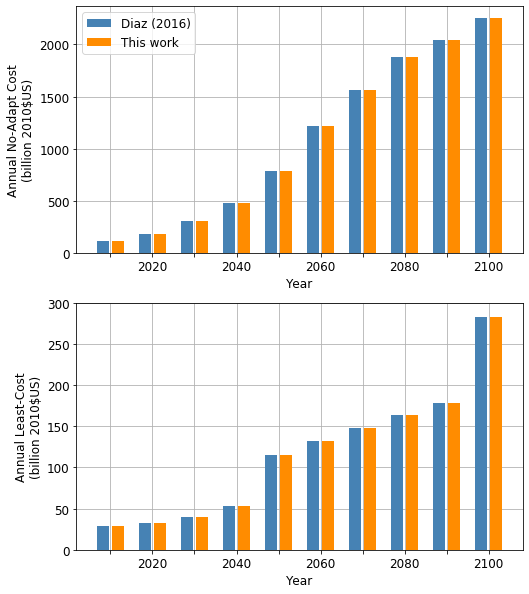

In [766]:
sep = 1.8
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].bar(x=dfDiaz.time-sep, height=dfDiaz.NoAdapt, width=3, color="steelblue", label="Diaz (2016)")
ax[0].bar(x=dfNew0.time+sep, height=dfNew0.NoAdapt, width=3, color="darkorange", label="This work")
ax[0].grid(); ax[0].set_axisbelow(True)
yticks = [0,500,1000,1500,2000]; ax[0].set_yticks(yticks); ax[0].set_yticklabels(yticks, fontsize=12)
ax[0].set_xticks(range(2010,2110,10)); ax[0].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[0].set_xlabel("Year", fontsize=12); ax[0].set_ylabel("Annual No-Adapt Cost\n(billion 2010$US)", fontsize=12)
ax[0].legend(fontsize=12)
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.Optimal, width=3, color="steelblue", label="Diaz (2016)")
ax[1].bar(x=dfNew0.time+sep, height=dfNew0.Optimal, width=3, color="darkorange", label="This work")
ax[1].grid(); ax[1].set_axisbelow(True)
yticks = [0,50,100,150,200,250,300]; ax[1].set_yticks(yticks); ax[1].set_yticklabels(yticks, fontsize=12)
ax[1].set_xticks(range(2010,2110,10)); ax[1].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[1].set_xlabel("Year", fontsize=12); ax[1].set_ylabel("Annual Least-Cost\n(billion 2010$US)", fontsize=12);
fig.savefig("baseline_comparison_rcp85.pdf", bbox_inches='tight');

## Figure: total no-adaptation and optimal costs over time - version of figure with perfect foresight (matching GAMS version) and limited foresight

#### total costs only

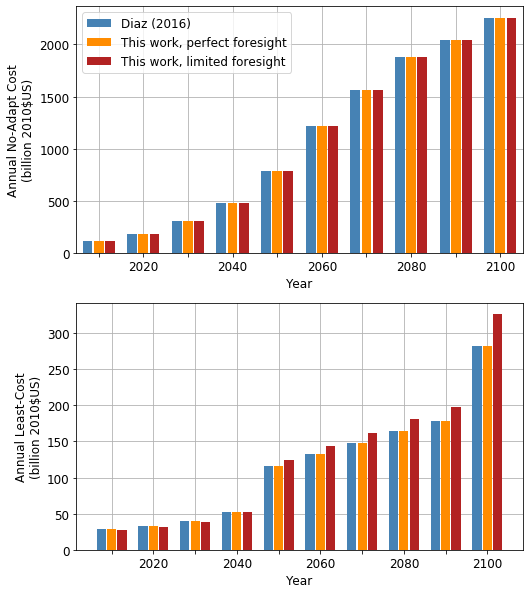

In [767]:
sep = 2.5
wid = 2.2

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].bar(x=dfDiaz.time-sep, height=dfDiaz.NoAdapt, width=wid, color="steelblue", label="Diaz (2016)")
ax[0].bar(x=dfNew0.time, height=dfNew0.NoAdapt, width=wid, color="darkorange", label="This work, perfect foresight")
ax[0].bar(x=dfNew1.time+sep, height=dfNew1.NoAdapt, width=wid, color="firebrick", label="This work, limited foresight")
ax[0].grid(); ax[0].set_axisbelow(True); ax[0].set_xlim([2005,2105])
yticks = [0,500,1000,1500,2000]; ax[0].set_yticks(yticks); ax[0].set_yticklabels(yticks, fontsize=12)
ax[0].set_xticks(range(2010,2110,10)); ax[0].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[0].set_xlabel("Year", fontsize=12); ax[0].set_ylabel("Annual No-Adapt Cost\n(billion 2010$US)", fontsize=12)
ax[0].legend(fontsize=12)
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.Optimal, width=wid, color="steelblue", label="Diaz (2016)")
ax[1].bar(x=dfNew0.time, height=dfNew0.Optimal, width=wid, color="darkorange", label="This work")
ax[1].bar(x=dfNew1.time+sep, height=dfNew1.Optimal, width=wid, color="firebrick", label="This work, limited foresight")
ax[1].grid(); ax[1].set_axisbelow(True); ax[0].set_xlim([2005,2105])
yticks = [0,50,100,150,200,250,300]; ax[1].set_yticks(yticks); ax[1].set_yticklabels(yticks, fontsize=12)
ax[1].set_xticks(range(2010,2110,10)); ax[1].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[1].set_xlabel("Year", fontsize=12); ax[1].set_ylabel("Annual Least-Cost\n(billion 2010$US)", fontsize=12);
fig.savefig("baseline_comparison_rcp85.pdf", bbox_inches='tight');

## with cost breakdown

#### get optimal actions/costs for this work

Get which segments adapt which which options and to which levels. Avoid doing any loops over segments, because that will be very slow.

In [1149]:
levs = {"RetreatCost" : [1,10,100,1000,10000], "ProtectCost" : [10,100,1000,10000], "NoAdaptCost" : [0]}
actions0, actions1 = {}, {}

actions0["retreat1"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="RetreatCost")&(dfO.level==1),"segments"])
actions0["retreat10"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="RetreatCost")&(dfO.level==10),"segments"])
actions0["retreat100"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="RetreatCost")&(dfO.level==100),"segments"])
actions0["retreat1000"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="RetreatCost")&(dfO.level==1000),"segments"])
actions0["retreat10000"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="RetreatCost")&(dfO.level==10000),"segments"])
actions0["protect10"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="ProtectCost")&(dfO.level==10),"segments"])
actions0["protect100"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="ProtectCost")&(dfO.level==100),"segments"])
actions0["protect1000"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="ProtectCost")&(dfO.level==1000),"segments"])
actions0["protect10000"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="ProtectCost")&(dfO.level==10000),"segments"])
actions0["noadapt"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="NoAdaptCost"),"segments"])

actions1["retreat1"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="RetreatCost")&(dfO1.level==1),"segments"])
actions1["retreat10"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="RetreatCost")&(dfO1.level==10),"segments"])
actions1["retreat100"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="RetreatCost")&(dfO1.level==100),"segments"])
actions1["retreat1000"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="RetreatCost")&(dfO1.level==1000),"segments"])
actions1["retreat10000"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="RetreatCost")&(dfO1.level==10000),"segments"])
actions1["protect10"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="ProtectCost")&(dfO1.level==10),"segments"])
actions1["protect100"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="ProtectCost")&(dfO1.level==100),"segments"])
actions1["protect1000"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="ProtectCost")&(dfO1.level==1000),"segments"])
actions1["protect10000"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="ProtectCost")&(dfO1.level==10000),"segments"])
actions1["noadapt"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="NoAdaptCost"),"segments"])

In [1186]:
retreat_segs0 = actions0["retreat1"]+actions0["retreat10"]+actions0["retreat100"]+actions0["retreat1000"]+actions0["retreat10000"]
protect_segs0 = actions0["protect10"]+actions0["protect100"]+actions0["protect1000"]+actions0["protect10000"]
retreat_segs1 = actions1["retreat1"]+actions1["retreat10"]+actions1["retreat100"]+actions1["retreat1000"]+actions1["retreat10000"]
protect_segs1 = actions1["protect10"]+actions1["protect100"]+actions1["protect1000"]+actions1["protect10000"]

In [1189]:
len(retreat_segs1) - len(retreat_segs0)

360

In [1190]:
len(protect_segs1) - len(protect_segs0)

-432

In [1191]:
len(actions1["noadapt"]) - len(actions0["noadapt"])

72

#### get optimal actions/costs for Diaz (2016)

In [933]:
columns_we_want = ["WetlandOptimalFixed", "RelocateOptimalFixed", "StormCapitalOptimalFixed", 
                   "StormPopOptimalFixed", "ConstructOptimalFixed", "FloodOptimalFixed"]
dfGsub = dfG.loc[(dfG.variable.isin(columns_we_want))]
flood_G, wetland_G, inundation_G, retreat_G, protect_G = [0]*20, [0]*20, [0]*20, [0]*20, [0]*20
for t in range(1,21):
    retreat_G[t-1] = dfGsub.loc[(dfGsub.time==t) & (dfGsub.variable=="RelocateOptimalFixed"), "value"].sum()
    protect_G[t-1] = dfGsub.loc[(dfGsub.time==t) & (dfGsub.variable=="ConstructOptimalFixed"), "value"].sum()
    inundation_G[t-1] = dfGsub.loc[(dfGsub.time==t) & (dfGsub.variable=="FloodOptimalFixed"), "value"].sum()
    wetland_G[t-1] = dfGsub.loc[(dfGsub.time==t) & (dfGsub.variable=="WetlandOptimalFixed"), "value"].sum()
    flood_G[t-1] = dfGsub.loc[(dfGsub.time==t) & ((dfGsub.variable=="StormCapitalOptimalFixed")|(dfGsub.variable=="StormPopOptimalFixed")), "value"].sum()

In [542]:
dfDiaz["RetreatOptimal"] = retreat_G[:10]
dfDiaz["ProtectOptimal"] = protect_G[:10]
dfDiaz["InundationOptimal"] = inundation_G[:10]
dfDiaz["WetlandOptimal"] = wetland_G[:10]
dfDiaz["FloodOptimal"] = flood_G[:10]

A little funky with how the variables are named, but what Diaz (2016) refers to in Figure 2 as "flood" damages is the losses to property and lives from storms (`StormCapital` and `StormPop`), which "inundation" is the actual flooded area (`Flood`).

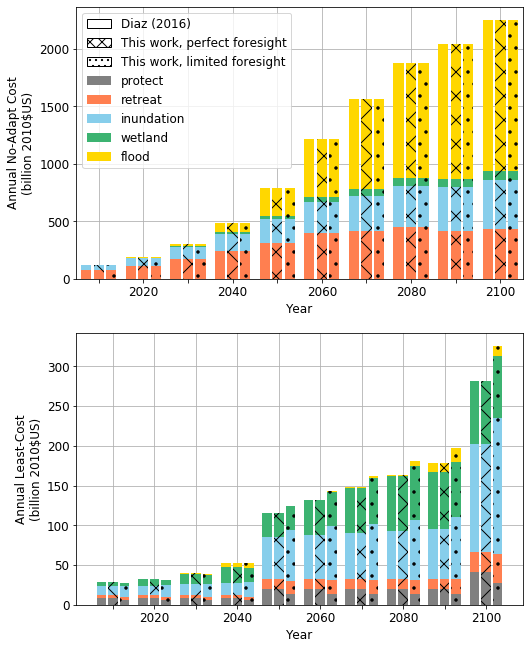

In [1310]:
sep = 2.8
wid = 2.3
cost_cols = {"protect" : "gray", "retreat" : "coral", "inundation" : "skyblue", "wetland" : "mediumseagreen", "flood" : "gold"}
hat = [1*'.', 1*'/', 1*'x']

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,11))
# PANEL A: NO ADAPTATION COSTS
# set up for the legend
ax[0].bar(x=dfDiaz.time-sep, height=1, width=.5, color="white", edgecolor="black", label="Diaz (2016)")
ax[0].bar(x=dfNew0.time, height=1, width=.5, color="white", hatch=2*hat[2], edgecolor="black", label="This work, perfect foresight")
ax[0].bar(x=dfNew1.time, height=1, width=.5, color="white", hatch=2*hat[0], edgecolor="black", label="This work, limited foresight")
# Diaz (2016) results
ax[0].bar(x=dfDiaz.time-sep, height=1, width=.5, color=cost_cols["protect"], label="protect")
ax[0].bar(x=dfDiaz.time-sep, height=dfDiaz.RelocateNoAdapt, width=wid, color=cost_cols["retreat"], label="retreat")
ax[0].bar(x=dfDiaz.time-sep, height=dfDiaz.FloodNoAdapt, bottom=dfDiaz.RelocateNoAdapt, width=wid, color=cost_cols["inundation"], label="inundation")
ax[0].bar(x=dfDiaz.time-sep, height=dfDiaz.WetlandNoAdapt, bottom=dfDiaz.RelocateNoAdapt+dfDiaz.FloodNoAdapt, width=wid, color=cost_cols["wetland"], label="wetland")
ax[0].bar(x=dfDiaz.time-sep, height=dfDiaz.StormCapitalNoAdapt+dfDiaz.StormPopNoAdapt, bottom=dfDiaz.RelocateNoAdapt+dfDiaz.FloodNoAdapt+dfDiaz.WetlandNoAdapt, width=wid, color=cost_cols["flood"], label="flood")
# This work, perfect foresight (match Diaz 2016)
ax[0].bar(x=dfNew0.time, height=dfNew0.RelocateNoAdapt, width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[0].bar(x=dfNew0.time, height=dfNew0.FloodNoAdapt,bottom=dfNew0.RelocateNoAdapt,
          width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[0].bar(x=dfNew0.time, height=dfNew0.WetlandNoAdapt, bottom=dfNew0.FloodNoAdapt+dfNew0.RelocateNoAdapt,
          width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[0].bar(x=dfNew0.time, height=dfNew0.StormCapitalNoAdapt+dfNew0.StormPopNoAdapt, bottom=dfNew0.RelocateNoAdapt+dfNew0.FloodNoAdapt+dfNew0.WetlandNoAdapt,
          width=wid, color=cost_cols["flood"], hatch=hat[2])
# This work, limited foresight
ax[0].bar(x=dfNew1.time+sep, height=dfNew1.RelocateNoAdapt, width=wid, color=cost_cols["retreat"], hatch=hat[0])
ax[0].bar(x=dfNew1.time+sep, height=dfNew1.FloodNoAdapt,bottom=dfNew1.RelocateNoAdapt,
          width=wid, color=cost_cols["inundation"], hatch=hat[0])
ax[0].bar(x=dfNew1.time+sep, height=dfNew1.WetlandNoAdapt, bottom=dfNew1.FloodNoAdapt+dfNew1.RelocateNoAdapt,
          width=wid, color=cost_cols["wetland"], hatch=hat[0])
ax[0].bar(x=dfNew1.time+sep, height=dfNew1.StormCapitalNoAdapt+dfNew1.StormPopNoAdapt, bottom=dfNew1.RelocateNoAdapt+dfNew1.FloodNoAdapt+dfNew1.WetlandNoAdapt,
          width=wid, color=cost_cols["flood"], hatch=hat[0])
# other plot configuration options
ax[0].grid(); ax[0].set_axisbelow(True); ax[0].set_xlim([2005,2105])
yticks = [0,500,1000,1500,2000]; ax[0].set_yticks(yticks); ax[0].set_yticklabels(yticks, fontsize=12)
ax[0].set_xticks(range(2010,2110,10)); ax[0].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[0].set_xlabel("Year", fontsize=12); ax[0].set_ylabel("Annual No-Adapt Cost\n(billion 2010$US)", fontsize=12)
ax[0].legend(fontsize=12)

# PANEL B: OPTIMAL COSTS
# Diaz (2016) results
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.ProtectOptimal, width=wid, color=cost_cols["protect"])
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.RetreatOptimal, bottom=dfDiaz.ProtectOptimal, width=wid, color=cost_cols["retreat"])
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.InundationOptimal, bottom=dfDiaz.ProtectOptimal+dfDiaz.RetreatOptimal, width=wid, color=cost_cols["inundation"])
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.WetlandOptimal, bottom=dfDiaz.ProtectOptimal+dfDiaz.RetreatOptimal+dfDiaz.InundationOptimal, width=wid, color=cost_cols["wetland"])
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.FloodOptimal, bottom=dfDiaz.ProtectOptimal+dfDiaz.RetreatOptimal+dfDiaz.InundationOptimal+dfDiaz.WetlandOptimal, width=wid, color=cost_cols["flood"])
# This work, perfect foresight (match Diaz 2016)
ax[1].bar(x=dfNew0.time, height=dfNew0.ProtectOptimal, width=wid, color=cost_cols["protect"], hatch=hat[2])
ax[1].bar(x=dfNew0.time, height=dfNew0.RetreatOptimal, bottom=dfNew0.ProtectOptimal, width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[1].bar(x=dfNew0.time, height=dfNew0.InundationOptimal,bottom=dfNew0.ProtectOptimal+dfNew0.RetreatOptimal, width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[1].bar(x=dfNew0.time, height=dfNew0.WetlandOptimal, bottom=dfNew0.ProtectOptimal+dfNew0.RetreatOptimal+dfNew0.InundationOptimal, width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[1].bar(x=dfNew0.time, height=dfNew0.FloodOptimal, bottom=dfNew0.ProtectOptimal+dfNew0.RetreatOptimal+dfNew0.InundationOptimal+dfNew0.WetlandOptimal, width=wid, color=cost_cols["flood"], hatch=hat[2])
# This work, limited foresight
ax[1].bar(x=dfNew1.time+sep, height=dfNew1.ProtectOptimal, width=wid, color=cost_cols["protect"], hatch=hat[0])
ax[1].bar(x=dfNew1.time+sep, height=dfNew1.RetreatOptimal, bottom=dfNew1.ProtectOptimal, width=wid, color=cost_cols["retreat"], hatch=hat[0])
ax[1].bar(x=dfNew1.time+sep, height=dfNew1.InundationOptimal,bottom=dfNew1.ProtectOptimal+dfNew1.RetreatOptimal, width=wid, color=cost_cols["inundation"], hatch=hat[0])
ax[1].bar(x=dfNew1.time+sep, height=dfNew1.WetlandOptimal, bottom=dfNew1.ProtectOptimal+dfNew1.RetreatOptimal+dfNew1.InundationOptimal, width=wid, color=cost_cols["wetland"], hatch=hat[0])
ax[1].bar(x=dfNew1.time+sep, height=dfNew1.FloodOptimal, bottom=dfNew1.ProtectOptimal+dfNew1.RetreatOptimal+dfNew1.InundationOptimal+dfNew1.WetlandOptimal, width=wid, color=cost_cols["flood"], hatch=hat[0])

# other plot configuration options
ax[1].grid(); ax[1].set_axisbelow(True); ax[0].set_xlim([2005,2105])
yticks = [0,50,100,150,200,250,300]; ax[1].set_yticks(yticks); ax[1].set_yticklabels(yticks, fontsize=12)
ax[1].set_xticks(range(2010,2110,10)); ax[1].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[1].set_xlabel("Year", fontsize=12); ax[1].set_ylabel("Annual Least-Cost\n(billion 2010$US)", fontsize=12);
fig.savefig("baseline_comparison_rcp85.pdf", bbox_inches='tight');

# HERE NOW 

## baseline

construct fix, limited foresight

In [1228]:
dfO = pd.read_csv("./output/ctrl_seg_85p50ssp0fixed_optimal.csv")
dfN = pd.read_csv("./output/ctrl_seg_85p50ssp0fixed.csv")
dfC = pd.read_csv("./output/ctrl_global_85p50ssp0fixed.csv")
df_ctrl = process_costs_df(dfC=dfC, dfO=dfO, dfN=dfN, tmax=10)

## baseline+updated SLR

construct fix, limited foresight, BRICK RCP8.5

In [1229]:
dfO = pd.read_csv("./output/ctrl+BRICKLSL85_seg_85p50ssp0fixed_optimal.csv")
dfN = pd.read_csv("./output/ctrl+BRICKLSL85_seg_85p50ssp0fixed.csv")
dfC = pd.read_csv("./output/ctrl+BRICKLSL85_global_85p50ssp0fixed.csv")
df_BRICK85 = process_costs_df(dfC=dfC, dfO=dfO, dfN=dfN, tmax=10)

## baseline+updated GDP/population via SSP5 & Jones and O'Neill (2016)

In [1231]:
dfO = pd.read_csv("./output/ctrl+SSP5+popJones_seg_85p50ssp5fixed_optimal.csv")
dfN = pd.read_csv("./output/ctrl+SSP5+popJones_seg_85p50ssp5fixed.csv")
dfC = pd.read_csv("./output/ctrl+SSP5+popJones_global_85p50ssp5fixed.csv")
df_SSP5 = process_costs_df(dfC=dfC, dfO=dfO, dfN=dfN, tmax=10)

## baseline+updated SLR+updated GPD/population via SSP5 & Jones and O'Neill (2016)

In [1232]:
dfO = pd.read_csv("./output/ctrl+SSP5+popJones+BRICKLSL85_seg_85p50ssp5fixed_optimal.csv")
dfN = pd.read_csv("./output/ctrl+SSP5+popJones+BRICKLSL85_seg_85p50ssp5fixed.csv")
dfC = pd.read_csv("./output/ctrl+SSP5+popJones+BRICKLSL85_global_85p50ssp5fixed.csv")
df_SSP5_BRICK85 = process_costs_df(dfC=dfC, dfO=dfO, dfN=dfN, tmax=10)

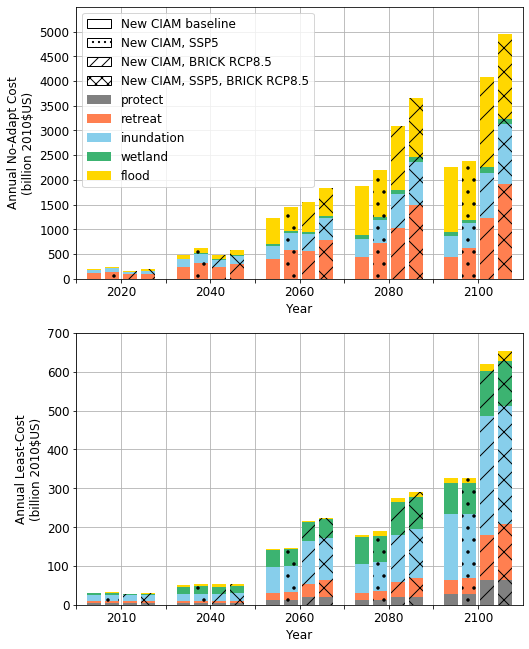

In [1312]:
sep = 2
wid = 3.1
cost_cols = {"protect" : "gray", "retreat" : "coral", "inundation" : "skyblue", "wetland" : "mediumseagreen", "flood" : "gold"}
times_plot = list(range(2010,2110,10))
idx_plot = [1,3,5,7,9]
times_plot = np.array([times_plot[k] for k in idx_plot])
hat = [1*'.', 1*'/', 1*'x']

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,11))
# PANEL A: NO ADAPTATION COSTS
# set up for the legend
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", edgecolor="black", label="New CIAM baseline")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[0], edgecolor="black", label="New CIAM, SSP5")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[1], edgecolor="black", label="New CIAM, BRICK RCP8.5")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[2], edgecolor="black", label="New CIAM, SSP5, BRICK RCP8.5")
# ctrl
ax[0].bar(x=times_plot-3*sep, height=1, width=.5, color=cost_cols["protect"], label="protect")
ax[0].bar(x=times_plot-3*sep, height=df_ctrl.RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], label="retreat")
ax[0].bar(x=times_plot-3*sep, height=df_ctrl.FloodNoAdapt[idx_plot], bottom=np.array(df_ctrl.RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], label="inundation")
ax[0].bar(x=times_plot-3*sep, height=df_ctrl.WetlandNoAdapt[idx_plot], bottom=np.array(df_ctrl.RelocateNoAdapt[idx_plot]+df_ctrl.FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], label="wetland")
ax[0].bar(x=times_plot-3*sep, height=df_ctrl.StormCapitalNoAdapt[idx_plot]+df_ctrl.StormPopNoAdapt[idx_plot], bottom=np.array(df_ctrl.RelocateNoAdapt[idx_plot]+df_ctrl.FloodNoAdapt[idx_plot]+df_ctrl.WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], label="flood")
# SSP5 pop & GDP
ax[0].bar(x=times_plot-sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=df_SSP5.RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=df_SSP5.FloodNoAdapt[idx_plot], bottom=np.array(df_SSP5.RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=df_SSP5.WetlandNoAdapt[idx_plot], bottom=np.array(df_SSP5.RelocateNoAdapt[idx_plot]+df_SSP5.FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=df_SSP5.StormCapitalNoAdapt[idx_plot]+df_SSP5.StormPopNoAdapt[idx_plot], bottom=np.array(df_SSP5.RelocateNoAdapt[idx_plot]+df_SSP5.FloodNoAdapt[idx_plot]+df_SSP5.WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[0])
# BRICK SLR RCP8.5
ax[0].bar(x=times_plot+sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=df_BRICK85.RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=df_BRICK85.FloodNoAdapt[idx_plot], bottom=np.array(df_BRICK85.RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=df_BRICK85.WetlandNoAdapt[idx_plot], bottom=np.array(df_BRICK85.RelocateNoAdapt[idx_plot]+df_BRICK85.FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=df_BRICK85.StormCapitalNoAdapt[idx_plot]+df_BRICK85.StormPopNoAdapt[idx_plot], bottom=np.array(df_BRICK85.RelocateNoAdapt[idx_plot]+df_BRICK85.FloodNoAdapt[idx_plot]+df_BRICK85.WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[1])
# BRICK SLR RCP8.5 & SSP5 pop/GDP
ax[0].bar(x=times_plot+3*sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.FloodNoAdapt[idx_plot], bottom=np.array(df_SSP5_BRICK85.RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.WetlandNoAdapt[idx_plot], bottom=np.array(df_SSP5_BRICK85.RelocateNoAdapt[idx_plot]+df_SSP5_BRICK85.FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.StormCapitalNoAdapt[idx_plot]+df_SSP5_BRICK85.StormPopNoAdapt[idx_plot], bottom=np.array(df_SSP5_BRICK85.RelocateNoAdapt[idx_plot]+df_SSP5_BRICK85.FloodNoAdapt[idx_plot]+df_SSP5_BRICK85.WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[2])
# other plot configuration options
ax[0].grid(); ax[0].set_axisbelow(True); ax[0].set_xlim([2010,2110]); ax[0].set_ylim([0,5500])
yticks = list(range(0,5500,500)); ax[0].set_yticks(yticks); ax[0].set_yticklabels(yticks, fontsize=12)
ax[0].set_xticks(range(2010,2110,10)); ax[0].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[0].set_xlabel("Year", fontsize=12); ax[0].set_ylabel("Annual No-Adapt Cost\n(billion 2010$US)", fontsize=12)
ax[0].legend(fontsize=12)

# PANEL B: OPTIMAL COSTS
# ctrl
ax[1].bar(x=times_plot-3*sep, height=df_ctrl.ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], label="protect")
ax[1].bar(x=times_plot-3*sep, height=df_ctrl.RetreatOptimal[idx_plot], bottom=np.array(df_ctrl.ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], label="retreat")
ax[1].bar(x=times_plot-3*sep, height=df_ctrl.InundationOptimal[idx_plot], bottom=np.array(df_ctrl.ProtectOptimal[idx_plot]+df_ctrl.RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], label="inundation")
ax[1].bar(x=times_plot-3*sep, height=df_ctrl.WetlandOptimal[idx_plot], bottom=np.array(df_ctrl.ProtectOptimal[idx_plot]+df_ctrl.RetreatOptimal[idx_plot]+df_ctrl.InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], label="wetland")
ax[1].bar(x=times_plot-3*sep, height=df_ctrl.FloodOptimal[idx_plot], bottom=np.array(df_ctrl.ProtectOptimal[idx_plot]+df_ctrl.RetreatOptimal[idx_plot]+df_ctrl.InundationOptimal[idx_plot]+df_ctrl.WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], label="flood")
# SSP5 pop & .25
ax[1].bar(x=times_plot-sep, height=df_SSP5.ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=df_SSP5.RetreatOptimal[idx_plot], bottom=np.array(df_SSP5.ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=df_SSP5.InundationOptimal[idx_plot], bottom=np.array(df_SSP5.ProtectOptimal[idx_plot]+df_SSP5.RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=df_SSP5.WetlandOptimal[idx_plot], bottom=np.array(df_SSP5.ProtectOptimal[idx_plot]+df_SSP5.RetreatOptimal[idx_plot]+df_SSP5.InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=df_SSP5.FloodOptimal[idx_plot], bottom=np.array(df_SSP5.ProtectOptimal[idx_plot]+df_SSP5.RetreatOptimal[idx_plot]+df_SSP5.InundationOptimal[idx_plot]+df_SSP5.WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[0])
# BRICK SLR RCP8.5
ax[1].bar(x=times_plot+sep, height=df_BRICK85.ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=df_BRICK85.RetreatOptimal[idx_plot], bottom=np.array(df_BRICK85.ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=df_BRICK85.InundationOptimal[idx_plot], bottom=np.array(df_BRICK85.ProtectOptimal[idx_plot]+df_BRICK85.RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=df_BRICK85.WetlandOptimal[idx_plot], bottom=np.array(df_BRICK85.ProtectOptimal[idx_plot]+df_BRICK85.RetreatOptimal[idx_plot]+df_BRICK85.InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=df_BRICK85.FloodOptimal[idx_plot], bottom=np.array(df_BRICK85.ProtectOptimal[idx_plot]+df_BRICK85.RetreatOptimal[idx_plot]+df_BRICK85.InundationOptimal[idx_plot]+df_BRICK85.WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[1])
# BRICK SLR RCP8.5 & SSP5 pop/GDP
ax[1].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.RetreatOptimal[idx_plot], bottom=np.array(df_SSP5_BRICK85.ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.InundationOptimal[idx_plot], bottom=np.array(df_SSP5_BRICK85.ProtectOptimal[idx_plot]+df_SSP5_BRICK85.RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.WetlandOptimal[idx_plot], bottom=np.array(df_SSP5_BRICK85.ProtectOptimal[idx_plot]+df_SSP5_BRICK85.RetreatOptimal[idx_plot]+df_SSP5_BRICK85.InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.FloodOptimal[idx_plot], bottom=np.array(df_SSP5_BRICK85.ProtectOptimal[idx_plot]+df_SSP5_BRICK85.RetreatOptimal[idx_plot]+df_SSP5_BRICK85.InundationOptimal[idx_plot]+df_SSP5_BRICK85.WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[2]) 
# other plot configuration options
ax[1].grid(); ax[1].set_axisbelow(True); ax[1].set_xlim([2010,2110])
yticks = list(range(0,800,100)); ax[1].set_yticks(yticks); ax[1].set_yticklabels(yticks, fontsize=12)
ax[1].set_xticks(range(2010,2110,10)); ax[1].set_xticklabels(["",2010,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[1].set_xlabel("Year", fontsize=12); ax[1].set_ylabel("Annual Least-Cost\n(billion 2010$US)", fontsize=12);
fig.savefig("updates_comparison_rcp85.pdf", bbox_inches='tight')